<a href="https://colab.research.google.com/github/marcinwolter/DeepLearning_2020/blob/main/RNN_numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Recurrent Neural Network
Numpy implementation of binary addition in RNN. 
Code from https://github.com/revsic/numpy-rnn/blob/master/RNN_numpy.ipynb 
This code is in turn based on [iamtrask's github.io](https://iamtrask.github.io/2015/11/15/anyone-can-code-lstm/).

The network is trained to add two binary numbers 

Input: binary a and b in the form of a vector of bins, ex. [1 1 1 1 0 1 1 0]

Output: binary c - predicted result

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Data Generation

Generate the binary array less than 256.

In [2]:
BIN_DIM = 8
INPUT_DIM = 2
HIDDEN_DIM = 16
OUTPUT_DIM = 1

ALPHA = 0.1
ITER_NUM = 10000
LOG_ITER = ITER_NUM // 10
PLOT_ITER = ITER_NUM // 200

In [3]:
largest = pow(2, BIN_DIM)
decimal = np.array([range(largest)]).astype(np.uint8).T
binary = np.unpackbits(decimal, axis=1)

## Prepare weights and deltas
Prepare weight and delta values to use in the optimization process.

In [4]:
# weight values
w0 = np.random.normal(0, 1, [INPUT_DIM, HIDDEN_DIM])
w1 = np.random.normal(0, 1, [HIDDEN_DIM, OUTPUT_DIM])
wh = np.random.normal(0, 2, [HIDDEN_DIM, HIDDEN_DIM])

In [5]:
# delta values
d0 = np.zeros_like(w0)
d1 = np.zeros_like(w1)
dh = np.zeros_like(wh)

In [6]:
errs = list()
accs = list()

error = 0
accuracy = 0

## Training
Training binary addition in RNN with Backpropagation Through Time.

In [7]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def deriv_sigmoid(out):
    return out * (1 - out)

def bin2dec(b):
    out = 0
    for i, x in enumerate(b[::-1]):
        out += x * pow(2, i)
    
    return out

In [8]:
for i in range(ITER_NUM + 1):
    # a + b = c
    a_dec = np.random.randint(largest / 2)
    b_dec = np.random.randint(largest / 2)
    c_dec = a_dec + b_dec
    
    a_bin = binary[a_dec]
    b_bin = binary[b_dec]
    c_bin = binary[c_dec]
    
    pred = np.zeros_like(c_bin)
    
    overall_err = 0 # total error in the whole calculation process.
    
    output_deltas = list()
    hidden_values = list()
    hidden_values.append(np.zeros(HIDDEN_DIM))
    
    future_delta = np.zeros(HIDDEN_DIM)
    
    # forward propagation
    for pos in range(BIN_DIM)[::-1]:
        X = np.array([[a_bin[pos], b_bin[pos]]]) # shape=(1, 2)
        Y = np.array([[c_bin[pos]]]) # shape=(1, 1)
        
        hidden = sigmoid(np.dot(X, w0) + np.dot(hidden_values[-1], wh))
        output = sigmoid(np.dot(hidden, w1))
        
        pred[pos] = np.round(output[0][0])
        
        # squared mean error
        output_err = Y - output
        output_deltas.append(output_err * deriv_sigmoid(output))
        hidden_values.append(hidden)
        
        overall_err += np.abs(output_err[0])
    
    # backpropagation through time
    for pos in range(BIN_DIM):
        X = np.array([[a_bin[pos], b_bin[pos]]])
        
        hidden = hidden_values[-(pos + 1)]
        prev_hidden = hidden_values[-(pos + 2)]
        
        output_delta = output_deltas[-(pos + 1)]
        hidden_delta = (np.dot(future_delta, wh.T) + np.dot(output_delta, w1.T)) * deriv_sigmoid(hidden)
        
        d1 += np.dot(np.atleast_2d(hidden).T, output_delta)
        dh += np.dot(np.atleast_2d(prev_hidden).T, hidden_delta)
        d0 += np.dot(X.T, hidden_delta)

        future_delta = hidden_delta 
    
    w1 += ALPHA * d1
    w0 += ALPHA * d0
    wh += ALPHA * dh
    
    d1 *= 0
    d0 *= 0
    dh *= 0
    
    error += overall_err
    if (bin2dec(pred) == c_dec):
        accuracy += 1
        
    if (i % PLOT_ITER == 0):
        errs.append(error / PLOT_ITER)
        accs.append(accuracy / PLOT_ITER)
        
        error = 0
        accuracy = 0
    
    if (i % LOG_ITER == 0):
        print('Iter', i)
        print("Error :", overall_err)
        print("Pred :", pred)
        print("True :", c_bin)
        print(a_dec, "+", b_dec, "=", bin2dec(pred))
        print('----------')

Iter 0
Error : [2.75854135]
Pred : [1 1 1 1 1 1 1 0]
True : [1 0 1 1 1 0 1 0]
75 + 111 = 254
----------
Iter 1000
Error : [3.9327152]
Pred : [0 0 0 0 0 0 1 0]
True : [1 0 0 1 0 0 1 1]
124 + 23 = 2
----------
Iter 2000
Error : [4.06314139]
Pred : [1 1 1 0 0 1 0 1]
True : [0 1 0 1 1 1 1 0]
69 + 25 = 229
----------
Iter 3000
Error : [3.8635699]
Pred : [0 0 0 0 0 1 0 0]
True : [0 1 0 0 0 0 1 0]
7 + 59 = 4
----------
Iter 4000
Error : [4.12492368]
Pred : [1 1 0 1 1 1 1 1]
True : [1 1 1 0 0 0 0 1]
126 + 99 = 223
----------
Iter 5000
Error : [3.66927793]
Pred : [0 1 1 0 0 0 0 1]
True : [0 1 0 1 1 1 1 1]
93 + 2 = 97
----------
Iter 6000
Error : [2.25717535]
Pred : [1 1 0 0 0 1 0 0]
True : [0 1 1 0 0 1 0 0]
51 + 49 = 196
----------
Iter 7000
Error : [1.54964259]
Pred : [1 0 1 1 0 1 1 1]
True : [1 0 1 1 0 1 1 1]
61 + 122 = 183
----------
Iter 8000
Error : [0.77194004]
Pred : [1 0 0 0 1 1 1 1]
True : [1 0 0 0 1 1 1 1]
125 + 18 = 143
----------
Iter 9000
Error : [0.60065191]
Pred : [1 0 1 0 1 0 1 

## Plot learning curve
Plot error and accuracy.

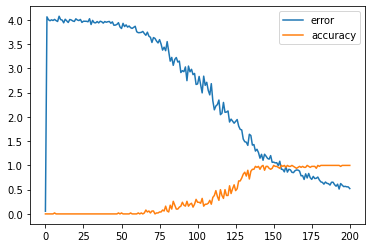

In [9]:
plt.plot(errs, label='error')
plt.plot(accs, label='accuracy')
plt.legend()

Test the network

In [10]:
TEST_ITER_NUM = 10000

n_yes = 0
n_no  = 0

for i in range(TEST_ITER_NUM + 1):
    # a + b = c
    # generate test data

    a_dec = np.random.randint(largest / 2)
    b_dec = np.random.randint(largest / 2)
    c_dec = a_dec + b_dec
    
    a_bin = binary[a_dec]
    b_bin = binary[b_dec]
    c_bin = binary[c_dec]
    
    pred = np.zeros_like(c_bin)
    
    overall_err = 0 # total error in the whole calculation process.
    
    output_deltas = list()
    hidden_values = list()
    hidden_values.append(np.zeros(HIDDEN_DIM))
    
    future_delta = np.zeros(HIDDEN_DIM)
    

    # forward propagation
    for pos in range(BIN_DIM)[::-1]:
        X = np.array([[a_bin[pos], b_bin[pos]]]) # shape=(1, 2)
        Y = np.array([[c_bin[pos]]]) # shape=(1, 1)
        
        hidden = sigmoid(np.dot(X, w0) + np.dot(hidden_values[-1], wh))
        output = sigmoid(np.dot(hidden, w1))
        
        pred[pos] = np.round(output[0][0])

        # squared mean error
        output_err = Y - output
        output_deltas.append(output_err * deriv_sigmoid(output))
        hidden_values.append(hidden)
        
        overall_err += np.abs(output_err[0])        



    # accuracy
    if (bin2dec(pred) == c_dec): 
      n_yes += 1
    else:
      n_no  += 1
    
    if i<30:
      print('Iter', i)
      print("Error :", overall_err)
      print("Pred :", pred)
      print("True :", c_bin)
      print(a_dec, "+", b_dec, "=", bin2dec(pred))
      print('----------')

# calculate accuracy
acc = float(n_yes)/float(n_yes+n_no)

print(" ")
print(" ")
print(" ")
print("---------------------------------------------------")
print(" ")
print("RNN accuracy = ",acc)
print(" ")
print(" ")

Iter 0
Error : [0.75919967]
Pred : [1 1 1 0 1 0 0 1]
True : [1 1 1 0 1 0 0 1]
115 + 118 = 233
----------
Iter 1
Error : [0.43868898]
Pred : [1 0 0 0 0 0 1 1]
True : [1 0 0 0 0 0 1 1]
80 + 51 = 131
----------
Iter 2
Error : [0.61644418]
Pred : [1 0 0 0 0 1 1 0]
True : [1 0 0 0 0 1 1 0]
40 + 94 = 134
----------
Iter 3
Error : [0.49953084]
Pred : [1 0 0 1 1 1 0 0]
True : [1 0 0 1 1 1 0 0]
50 + 106 = 156
----------
Iter 4
Error : [0.47026232]
Pred : [1 0 0 1 1 1 1 1]
True : [1 0 0 1 1 1 1 1]
127 + 32 = 159
----------
Iter 5
Error : [0.83731148]
Pred : [1 0 0 0 0 1 0 0]
True : [1 0 0 0 0 1 0 0]
38 + 94 = 132
----------
Iter 6
Error : [0.53986932]
Pred : [1 0 1 0 0 0 0 0]
True : [1 0 1 0 0 0 0 0]
84 + 76 = 160
----------
Iter 7
Error : [0.37735232]
Pred : [0 0 1 0 0 1 1 1]
True : [0 0 1 0 0 1 1 1]
39 + 0 = 39
----------
Iter 8
Error : [0.33383916]
Pred : [0 1 0 0 1 1 1 1]
True : [0 1 0 0 1 1 1 1]
77 + 2 = 79
----------
Iter 9
Error : [0.43751448]
Pred : [1 0 1 0 1 1 1 1]
True : [1 0 1 0 1 1 